In [1]:
from dataset import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
torch.manual_seed(0)
torch.cuda.manual_seed(0)
data_path = '/data/lzt/project/waysguider/dataset'


In [2]:
dataset = GuiderDataset(data_path,0.2,max_len=12)
data = dataset.data



Data Preprocess Done!
Dataset size:6713, train:5370, val:1343


## raw

In [3]:
len(data)

6760

In [3]:
def interval(seq):
    intervals = []
    seq = seq[:-1]
    seq_ = seq[1:]
    seq = seq[:-1]
    for i in range(len(seq)):
        inter = np.sqrt((seq[i][0] - seq_[i][0]) ** 2 + (seq[i][1] - seq_[i][1]) ** 2).item()
        intervals.append(inter)
    return intervals

In [4]:
length = []
intervals_avg = []
for seq in data:
    length.append(len(seq))
    intervals_avg.append(np.array(interval(seq)).mean().item())
summary = pd.DataFrame()
summary['id'] = list(range(len(data)))
summary['length'] = length
summary['avg_inter'] = intervals_avg

In [6]:
summary.to_csv('summary.csv')

In [7]:
max(summary['length'])

21

5435


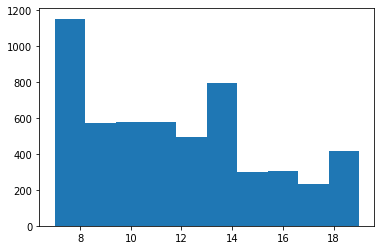

In [11]:
plt.hist(summary['length'].loc[summary['length']<20].loc[summary['length']>6])
print(summary['length'].loc[summary['length']<20].loc[summary['length']>6].shape[0])

6670


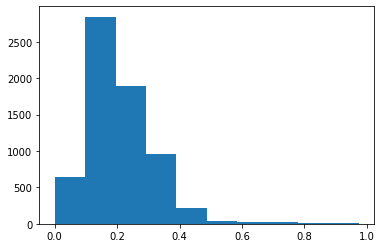

In [5]:
plt.hist(summary['avg_inter'].loc[summary['avg_inter']<1])
print(summary['avg_inter'].loc[summary['avg_inter']<1].shape[0])

6760


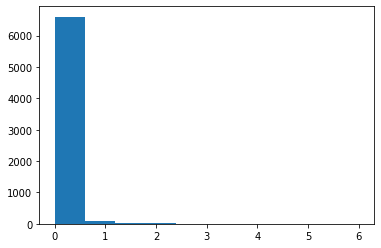

In [7]:
plt.hist(summary['avg_inter'])
print(summary['avg_inter'].shape[0])

In [4]:
cache = []
for i in range(len(data)):
    cache.extend(interval(data[i]))

(array([1.30672e+05, 1.80000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([6.23626743e-08, 5.28626780e-01, 1.05725350e+00, 1.58588021e+00,
        2.11450693e+00, 2.64313365e+00, 3.17176037e+00, 3.70038708e+00,
        4.22901380e+00, 4.75764052e+00, 5.28626724e+00]),
 <a list of 10 Patch objects>)

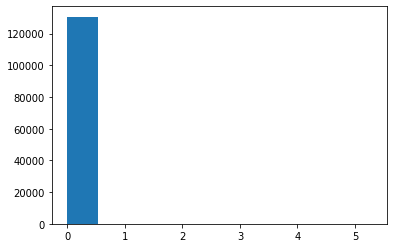

In [5]:
import matplotlib.pyplot as plt
plt.hist(cache)

In [6]:
cache[1:10]

[0.05754787463633821,
 0.04242741915497592,
 0.028463778829250976,
 0.015981864959769436,
 0.007442697710512366,
 0.007299108112575403,
 0.006161953280213028,
 0.0031523514937913753,
 0.01480775541225814]

In [9]:
print(max(cache))
print(min(cache))

5.286267235676357
6.23626743237986e-08


In [8]:
data[0]

[[0.4162920025199994, 0.0],
 [0.3869267398347111, 0.006356128040940765],
 [0.3302952330230998, 0.016585023944513364],
 [0.28820587800652736, 0.021930310694627402],
 [0.25975802097893236, 0.022882222338652027],
 [0.24405100813213684, 0.01993099292992983],
 [0.23979825081133627, 0.013822981438417791],
 [0.24286086062119278, 0.0071974701078384865],
 [0.24782153997728748, 0.0035421549978180223],
 [0.24925696106822348, 0.0063487340955996644],
 [0.24174379607837065, 0.019108905418293964],
 [0.22030825665418663, 0.044413036573577855],
 [0.18371616963476955, 0.07735353524010546],
 [0.13258790022847408, 0.10930444410577989],
 [0.06755714425762496, 0.13161307784322113],
 [-4.2332006896639744e-13, 0.13507609029931378],
 '8_7']

## torch

In [18]:
import torch.utils.data as Data
dataloader = Data.DataLoader(dataset,batch_size = 32)
data_cache = []
for i,data in enumerate(dataloader):
    seq = data['seq']
    for i in range(seq.shape[0]):
        data_cache.append(seq[i])

In [36]:
def interval_tensor(seq):
    #seq = seq.tolist()
    seq_ = np.array(seq[1:])
    seq = np.array(seq[:-1])
    intervals = np.sqrt(np.power(seq-seq_,2).sum(axis=1)).mean()

    return intervals

In [37]:
x = [[1,1],[1,4],[5,4]]
interval_tensor(x)

3.5

In [30]:
cache = []
for i in range(len(data_cache)):
    cache.extend(interval_tensor(data_cache[i]))


TypeError: 'float' object is not iterable

In [ ]:
cache = []
for seq in range(len(data_cache)):
    seq = seq.tolist()
    seq_ = np.array(seq[1:])
    seq = np.array(seq[:-1])
    intervals = np.sqrt(np.power(seq-seq_,2).sum(axis=1)).mean().item()


    cache.append()

(array([6.5514e+04, 1.8150e+03, 7.0000e+00, 1.0000e+02, 1.4900e+02,
        7.0000e+00, 0.0000e+00, 1.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([ 0.       ,  1.1000063,  2.2000126,  3.3000189,  4.4000252,
         5.5000315,  6.6000378,  7.7000441,  8.8000504,  9.9000567,
        11.000063 ]),
 <a list of 10 Patch objects>)

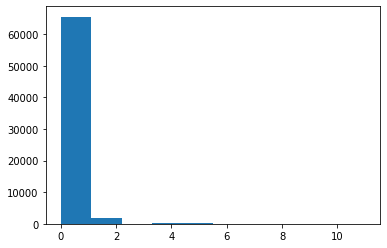

In [21]:
plt.hist(cache)

In [22]:
len(cache)

67600

28542

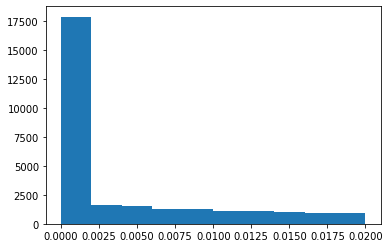

In [38]:
cache_ = []
for i in range(len(cache)):
    if cache[i] < 0.02:
        cache_.append(cache[i])
plt.hist(cache_)
len(cache_)

In [24]:
len(cache)

280230

In [25]:
cache[:10]

[0.030045291207738665,
 0.057547873360788586,
 0.0424274073110391,
 0.028463788256612922,
 0.015981868316956988,
 0.007442699851365554,
 0.007299106352051039,
 0.006161958485481472,
 0.0031523551468084074,
 0.014807754750534507]